In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Eso tilin


In [ ]:
url = 'COVID19MEXICO.csv'

In [ ]:
df = pd.read_csv(url)
df.sample(20)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
676500,2023-07-11,g452827,2,9,9,2,9,9,3,1,...,2,1,2,2,97,7,99,México,97,97
138397,2023-07-11,g2585bb,1,4,5,2,5,5,35,1,...,2,2,97,1,2,7,99,México,97,97
542465,2023-07-11,g1ef41a,2,4,21,1,21,21,114,1,...,2,2,97,1,1,3,99,México,97,97
801763,2023-07-11,g29bae8,1,12,21,2,21,21,71,2,...,2,1,1,1,1,3,99,México,97,2
624945,2023-07-11,g386cce,2,12,8,1,8,8,37,1,...,1,2,97,1,2,7,99,México,97,97
49414,2023-07-11,g3c3f69,2,6,8,1,8,8,52,1,...,2,2,97,1,1,3,99,México,97,97
816538,2023-07-11,g28cba0,2,12,25,1,25,25,6,1,...,2,2,97,1,1,3,99,México,97,97
318226,2023-07-11,g288be4,2,9,9,1,9,9,3,1,...,1,2,97,1,2,7,99,México,97,97
234393,2023-07-11,g223f9b,2,4,20,1,20,20,67,1,...,2,2,97,1,2,7,99,México,97,97
693144,2023-07-11,g307d19,1,4,32,2,32,32,10,1,...,2,2,97,1,2,7,99,México,97,97


In [ ]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [ ]:
columnas_mantener = ['FECHA_INGRESO','RESULTADO_ANTIGENO']

df = df.drop(columns = [col for col in df.columns if col not in columnas_mantener])

df.columns

df.sample(15)


,FECHA_INGRESO,RESULTADO_ANTIGENO
503268,2023-03-07,1
255675,2023-01-30,2
222796,2023-01-26,2
7776,2023-01-02,1
238999,2023-01-31,97
505836,2023-03-08,2
340469,2023-02-14,1
377862,2023-02-14,2
339378,2023-02-10,1
390325,2023-02-20,1


In [ ]:
df.dtypes

FECHA_INGRESO         object
RESULTADO_ANTIGENO     int64
dtype: object

In [ ]:
df['fecha'] = pd.to_datetime(df['FECHA_INGRESO'])
df.sample(10)
df.dtypes

FECHA_INGRESO                 object
RESULTADO_ANTIGENO             int64
fecha                 datetime64[ns]
dtype: object

In [ ]:
positivos = df[df['RESULTADO_ANTIGENO'] == 1]
del positivos['FECHA_INGRESO']
positivos.sample(10)

,RESULTADO_ANTIGENO,fecha
657532,1,2023-04-03
14826,1,2023-01-03
394756,1,2023-02-20
569930,1,2023-03-17
942043,1,2023-06-21
396144,1,2023-02-07
641176,1,2023-03-16
505739,1,2023-03-08
247524,1,2023-01-20
943829,1,2023-06-22


In [ ]:
total = positivos['fecha'].value_counts()

total = total.sort_index()


df = pd.DataFrame({'fecha': total.index, 'conteo': total.values})

x , y = df['fecha'], df['conteo']
df

,fecha,conteo
0,2023-01-01,212
1,2023-01-02,2697
2,2023-01-03,4190
3,2023-01-04,5130
4,2023-01-05,4744
...,...,...
186,2023-07-06,379
187,2023-07-07,311
188,2023-07-08,93
189,2023-07-09,68


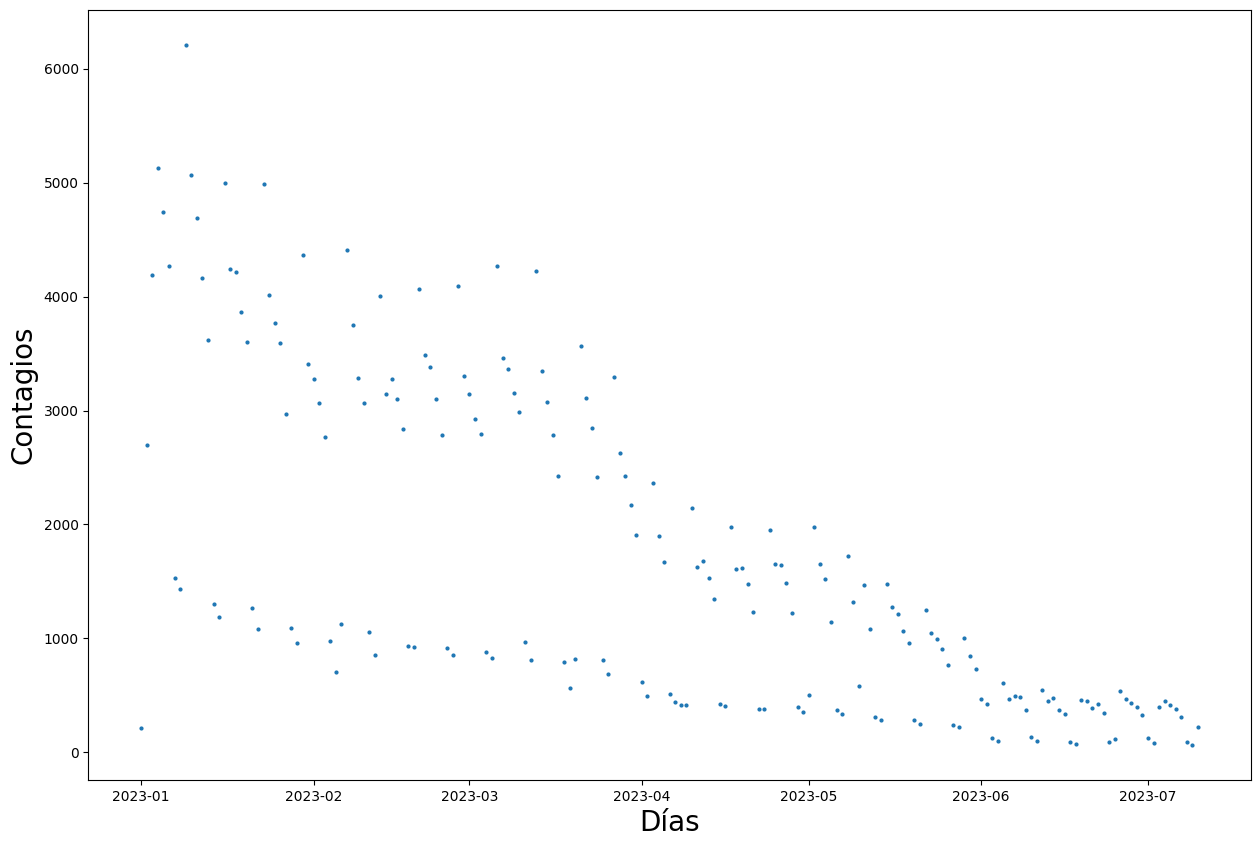

In [ ]:
#Incrementa el tamaño de gráfico
plt.figure(figsize=(15,10))

#Crear el grafico de correlación Años vs SAlario
plt.plot(x,y, 'o', markersize=2)

plt.ylabel('Contagios', fontsize= 20)

plt.xlabel('Días', fontsize= 20)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#Determinar la correlación

In [ ]:
df['dias'] = [ i+1 for i in range(len(df))]
df_2 =df.copy()
df



,fecha,conteo,dias
0,2023-01-01,212,1
1,2023-01-02,2697,2
2,2023-01-03,4190,3
3,2023-01-04,5130,4
4,2023-01-05,4744,5
...,...,...,...
186,2023-07-06,379,187
187,2023-07-07,311,188
188,2023-07-08,93,189
189,2023-07-09,68,190


In [ ]:
del df_2['fecha']
df_2

,conteo,dias
0,212,1
1,2697,2
2,4190,3
3,5130,4
4,4744,5
...,...,...
186,379,187
187,311,188
188,93,189
189,68,190


In [ ]:
df_2.corr(method='pearson')

,conteo,dias
conteo,1.00000,-0.73335
dias,-0.73335,1.00000


#Realizar una regresión lineal simple


##Calcular la pendiente y la intersección-y, de la línea de regresión lineal

In [ ]:
x=df_2['dias']
m, b = np.polyfit(x,y,1)
d = np.polyfit(x,y,1)
print('La pendiente de la linea es  {:.2f}.'.format(m))
print('La y-interseccion es  {:.2f}.'.format(b))
print('La mejor linea de regresion lineal es {:.2f}x + {:.2f}.'.format(m,b))
d

La pendiente de la linea es  -19.14.
La y-interseccion es  3545.74.
La mejor linea de regresion lineal es -19.14x + 3545.74.


array([ -19.14108742, 3545.74334527])

In [ ]:
#Coordenada y para elcentroide
y_mean = y.mean()
#Coordenada x para el centroide
x_mean = int(x.mean())

print('El centroide para este data frame es x = {:.2f} and y = {:.2f}'.format(x_mean,y_mean))

El centroide para este data frame es x = 96.00 and y = 1708.20


#Superponer la línea de regresión y el punto del centroide en el gráfico


In [ ]:
x_mean

96

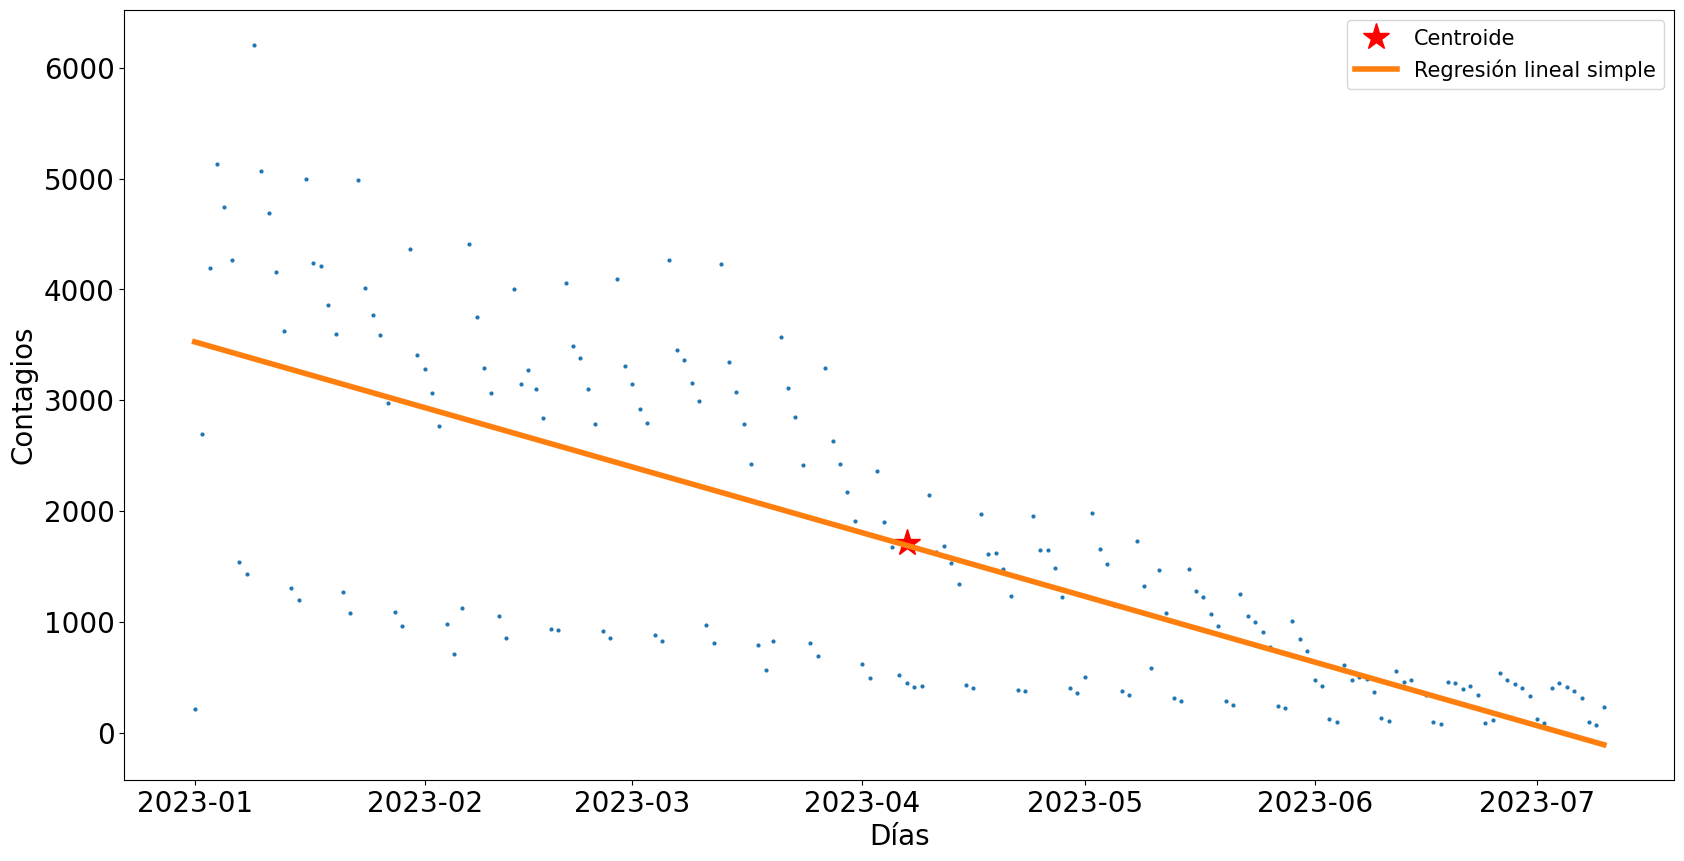

In [ ]:
x=df['fecha']
x_2 =df_2['dias']
#Determinar el tamaño el gráfico
plt.figure(figsize = (20,10))
#Dibujar el diagrama de dispersión del conjunto de datos

plt.plot(x,y, 'o', markersize = 2)
#Punto del centroide del gráfico
plt.plot(x[x_mean],y_mean, '*', markersize = 20, color='r', label='Centroide')

#Gráfica de la lenea de la regresión lineal
plt.plot(x, m*(x.index.values+1)+b, '-', label='Regresión lineal simple', linewidth = 4)
#Crear los titulos del eje Y and x
plt.ylabel('Contagios',fontsize = 20)
plt.xlabel('Días',fontsize = 20)
#Aumentar las marcas de los valores de X y Y
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#Señalar el punto del centroide en la gráfica
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext = (x_mean-3, y_mean-20),arrowprops = dict(facecolor = 'black', shrink= 0.05),fontsize = 30)

#crear la leyenda
plt.legend(loc = 'upper right', fontsize = 15)

plt.show()


#Funcion predictora


In [ ]:
df[10:]

,fecha,conteo,dias
10,2023-01-11,4688,11
11,2023-01-12,4159,12
12,2023-01-13,3622,13
13,2023-01-14,1302,14
14,2023-01-15,1192,15
...,...,...,...
186,2023-07-06,379,187
187,2023-07-07,311,188
188,2023-07-08,93,189
189,2023-07-09,68,190


In [ ]:
def prediccion(q=1):
  if q >= 1:
   return m * q + b
  else:
    print('Edad menor a un año de experiencia')

prediccion(192)

-129.34543951501746

In [ ]:
dic = {'Dias':x_2,
       'Contagios':y,
       'contagios_predecidos':  (m * x_2 + b).apply(lambda val: val if val >= 0 else 0)
       }
#'contagios_predecidos':  m * x_2 + b


df_final = pd.DataFrame(dic)
df_final[-10:]

,Dias,Contagios,contagios_predecidos
181,182,125,62.065435
182,183,83,42.924347
183,184,398,23.783260
184,185,448,4.642172
185,186,413,0.000000
186,187,379,0.000000
187,188,311,0.000000
188,189,93,0.000000
189,190,68,0.000000
190,191,226,0.000000


In [ ]:
df[-100:]